## Librerías

Cargo las librerías que voy a utilizar durante el desarrolo de la etapa I del trabajo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
plt.rcParams["figure.figsize"] = (15, 15)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import seaborn as sns
from datetime import datetime
from matplotlib.dates import MonthLocator
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

## Datos

Guardo los datos que recolecté del datawarehouse del modelo USD Metrics de Tenaris en una variable.

In [2]:
datos_1 = pd.read_csv('..\Archivos\data_req_inc.csv', delimiter=',',encoding = 'latin-1')
datos_1.set_index('Row', inplace=True)

Consulto la variable para ver las columnas y algunos registros.

In [3]:
datos_1

,REQ_OPEN_DATE_ID_SK,ANALYST_INIT_CONTACT_ID_SK,REQ_TYPE_DESC,REQ_CONFIG_ITEM_NAME,INIT_USER_GROUP,REQ_PRIORITY_SYM_DESC,REQ_IMPACT_SYM_DESC,REQ_CATEGORY_NAME,LOCATION_NAME,END_USER_CONTACT_ID_SK,ELAPSED_DAYS
Row,,,,,,,,,,,
1,20221226,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,2-Medium,2-Medium,Appls.Outdated Data,Brazil.Pindamonhangaba,178499,20
2,20230921,178499,Request,BI.Industrial.Production,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Request for information,Brazil.Pindamonhangaba,178499,8
3,20230404,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Outdated Data,Brazil.Pindamonhangaba,178499,8
4,20230816,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Others,Brazil.Pindamonhangaba,178499,43
5,20230814,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Outdated Data,Brazil.Pindamonhangaba,178499,0
...,...,...,...,...,...,...,...,...,...,...,...
2485,20211104,143189,Incident,BI.Industrial.Production,GLOBAL SUPPORT SAP - Active Cycle,2-Medium,2-Medium,Appls.Data incident,Uruguay.Montevideo,107332,12
2486,20220311,100023,Incident,BI.Industrial.Industrial_Performance,RA IND SUPPORT CA L2 IM,2-Medium,2-Medium,Appls.Erroneous behaviour,Canada.Sault St. Marie,93760,5
2487,20230411,76508,Incident,BI.Industrial.Industrial_Performance,RA IND SUPPORT CA L2 IM,2-Medium,2-Medium,Applications.Data incident,Mexico.Veracruz,177508,0


## Análisis descriptivo

Comienzo explorando la cantidad de tickets por Configuration Item (descripción del ID del modelo afecatado)

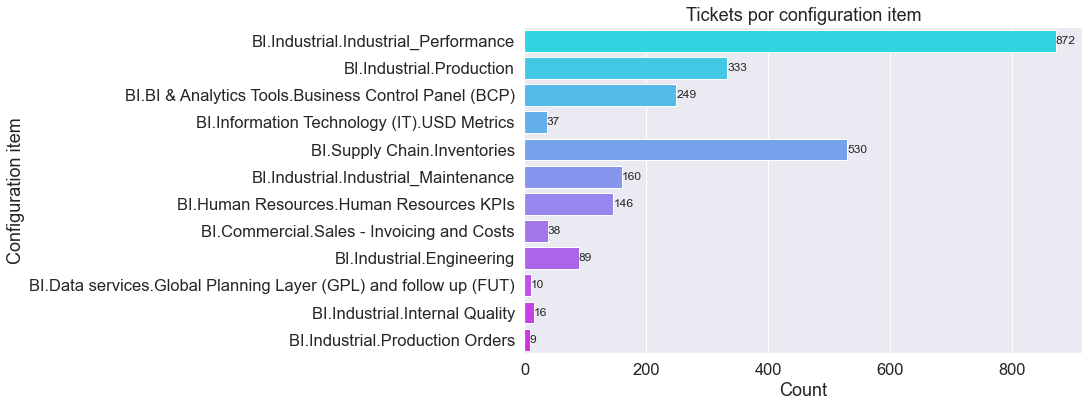

In [4]:
plt.figure(figsize=(10, 6))

g = sns.countplot(data = datos_1, y = 'REQ_CONFIG_ITEM_NAME', palette = 'cool')

for c in g.containers:
    labels = [f'{int(v)}' for v in c.datavalues]
    g.bar_label(c, labels=labels, label_type='edge', size = 12)

plt.title("Tickets por configuration item", size = 18)

plt.ylabel('Configuration item', size = 18)
plt.xlabel('Count', size = 18)


Le cambio el nombre a los modelos para acortarlos y los almaceno en una nueva columna llamada DATA_MODEL.

In [3]:
mapeo_CI = {
    "BI.BI & Analytics Tools.Business Control Panel (BCP)": "Business Control Panel",
    "BI.Information Technology (IT).USD Metrics": "USD Metrics",
    "BI.Supply Chain.Inventories" : "Supply Chain Inventories",
    "BI.Commercial.Sales - Invoicing and Costs" : "Invoicing and Costs",
    "BI.Industrial.Industrial_Performance" : "Industrial Performance",
    "BI.Human Resources.Human Resources KPIs" : "Human Resources KPIs",
    "BI.Industrial.Engineering" : "Industrial Engineering",
    "BI.Industrial.Production" : "Industrial Production",
    "BI.Industrial.Internal_Quality" : "Industrial Internal Quality",
    "BI.Industrial.Industrial_Maintenance" : "Industrial Maintenance",
    "BI.Data services.Global Planning Layer (GPL) and follow up (FUT)" : "Global Planning Layer",
    "BI.Industrial.Production Orders" : "Industrial Production Orders"
}

datos_1["DATA_MODEL"] = datos_1["REQ_CONFIG_ITEM_NAME"].map(mapeo_CI)

Vuelvo a generar el gráfico

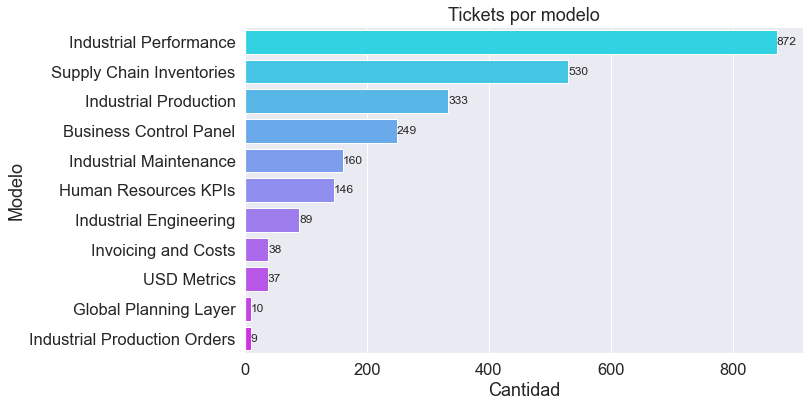

In [9]:
plt.figure(figsize=(10, 6))

g = sns.countplot(data = datos_1, y = 'DATA_MODEL', palette = 'cool', order = datos_1['DATA_MODEL'].value_counts().index)
for c in g.containers:
    labels = [f'{int(v)}' for v in c.datavalues]
    g.bar_label(c, labels=labels, label_type='edge', size = 12)

plt.title("Tickets por modelo", size = 18)

plt.ylabel('Modelo', size = 18)
plt.xlabel('Cantidad', size = 18)

plt.savefig('..\img\Tickets_por_CI.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

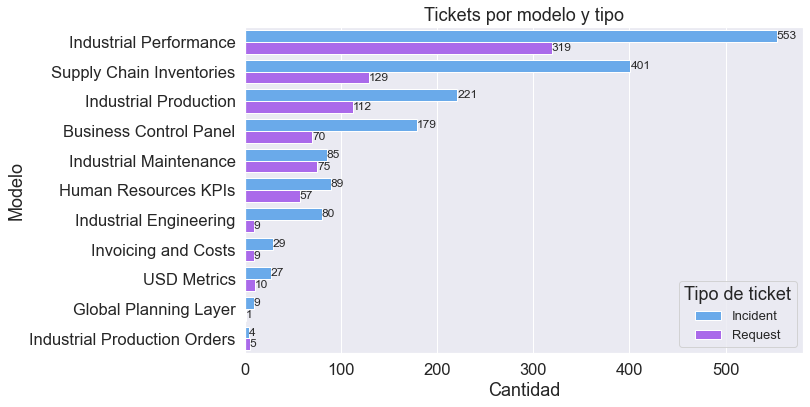

In [10]:
plt.figure(figsize=(10, 6))

g = sns.countplot(data = datos_1, y = 'DATA_MODEL', palette = 'cool', hue = 'REQ_TYPE_DESC', order = datos_1['DATA_MODEL'].value_counts().index)

for c in g.containers:
    labels = [f'{int(v)}' for v in c.datavalues]
    g.bar_label(c, labels=labels, label_type='edge', size = 12)

plt.title("Tickets por modelo y tipo", size = 18)

plt.ylabel('Modelo', size = 18)
plt.xlabel('Cantidad', size = 18)

plt.legend(title = 'Tipo de ticket', fontsize = 13)

plt.savefig('..\img\Tickets_por_CI_type.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

Analizo la distribucion de tickets por prioridad.

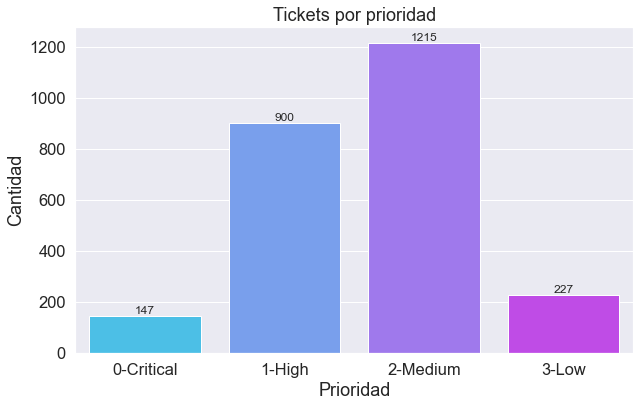

In [25]:
plt.figure(figsize=(10, 6))

orden = ['0-Critical', '1-High', '2-Medium', '3-Low']

g = sns.countplot(data = datos_1, x = 'REQ_PRIORITY_SYM_DESC', palette = 'cool',
                    order = orden)

for c in g.containers:
    labels = [f'{int(v)}' for v in c.datavalues]
    g.bar_label(c, labels=labels, label_type='edge', size = 12)

plt.title("Tickets por prioridad", size = 18)

plt.ylabel('Cantidad', size = 18)
plt.xlabel('Prioridad', size = 18)

plt.savefig('..\img\Tickets_por_Priority.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

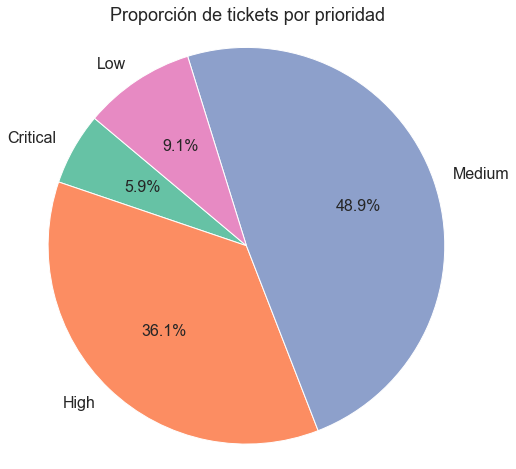

In [12]:
labels = ['Critical', 'High', 'Medium', 'Low']
sizes = [5.9, 36.1, 48.9, 9.1] 

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 16}, colors=sns.color_palette('Set2'))
plt.axis('equal')  
plt.title('Proporción de tickets por prioridad')

plt.savefig('..\img\Tickets_por_Priority_pie.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')


También la distribución por tipo de ticket

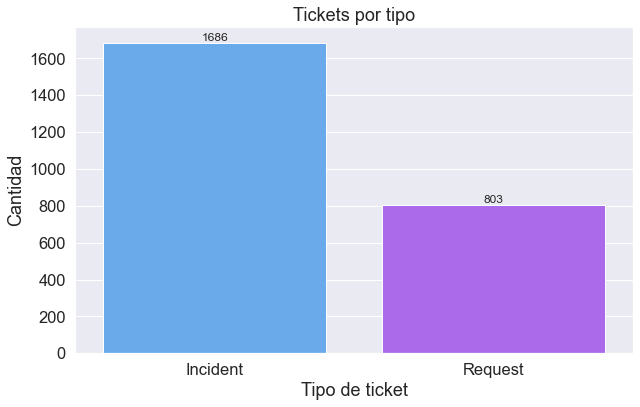

In [27]:
plt.figure(figsize=(10, 6))

g = sns.countplot(data = datos_1, x = 'REQ_TYPE_DESC', palette = 'cool')

for c in g.containers:
    labels = [f'{int(v)}' for v in c.datavalues]
    g.bar_label(c, labels=labels, label_type='edge', size = 12)

plt.title("Tickets por tipo", size = 18)

plt.ylabel('Cantidad', size = 18)
plt.xlabel('Tipo de ticket', size = 18)

plt.savefig('..\img\Tickets_por_type.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

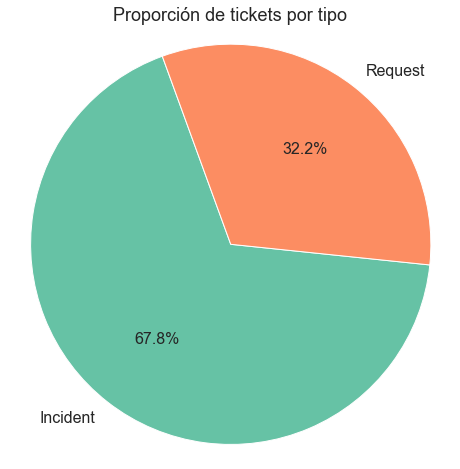

In [11]:
labels = ['Incident', 'Request']
sizes = [67.8, 32.2] 

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=110, textprops={'fontsize': 16}, colors=sns.color_palette('Set2'))  
plt.axis('equal')
plt.title('Proporción de tickets por tipo')

plt.savefig('..\img\Tickets_por_type_pie.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

Exploro la cantidad de tickets por tipo y prioridad

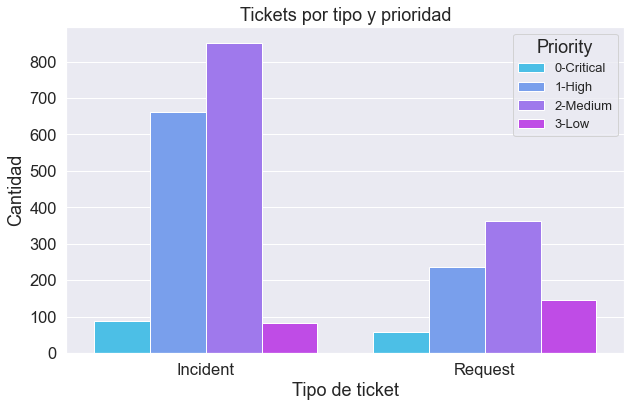

In [31]:
plt.figure(figsize=(10, 6))

hue_orden = ['0-Critical', '1-High', '2-Medium', '3-Low']

g = sns.countplot(data = datos_1, x = 'REQ_TYPE_DESC', palette = 'cool', hue = 'REQ_PRIORITY_SYM_DESC',hue_order = hue_orden)


plt.title("Tickets por tipo y prioridad", size = 18)

plt.ylabel('Cantidad', size = 18)
plt.xlabel('Tipo de ticket', size = 18)

plt.legend(title = 'Priority', fontsize = 13)

plt.savefig('..\img\Tickets_por_type_priority.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

Gráfico de tickets por prioridad y modelo afectado

<Figure size 576x576 with 0 Axes>

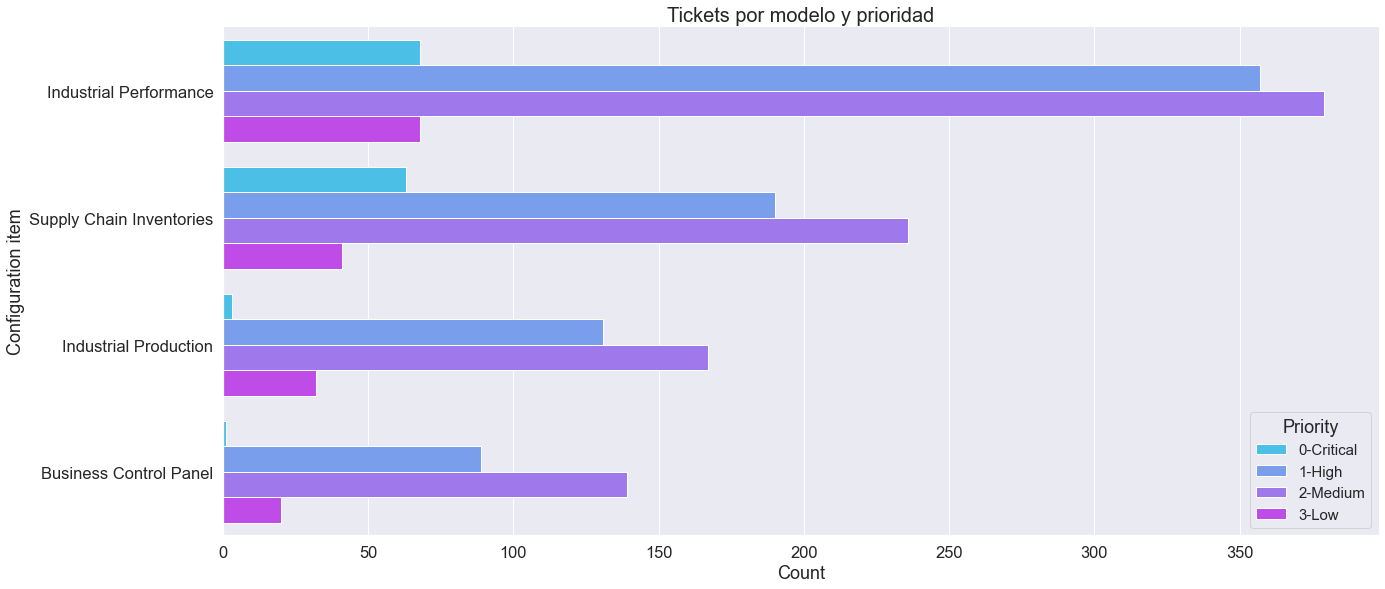

In [10]:
df_mod = datos_1[(datos_1["DATA_MODEL"] == "Industrial Performance") | (datos_1["DATA_MODEL"] == "Supply Chain Inventories") | (datos_1["DATA_MODEL"] == "Industrial Production")
                 | (datos_1["DATA_MODEL"] == "Business Control Panel")]

order = ['Industrial Performance', 'Supply Chain Inventories', 'Industrial Production', 'Business Control Panel']

plt.figure(figsize=(8, 8))
hue_orden = ['0-Critical', '1-High', '2-Medium', '3-Low']
g = sns.catplot(data = df_mod, y = 'DATA_MODEL', kind = 'count', hue = 'REQ_PRIORITY_SYM_DESC', palette = 'cool', height=8, aspect=10/4,
                hue_order = hue_orden, order= order)
g._legend.remove()
ax = g.facet_axis(0, 0) 

ax.set_title("Tickets por modelo y prioridad", size = 20)
plt.ylabel('Configuration item', size = 18)
plt.xlabel('Count', size = 18)

plt.legend(loc = 'lower right', title = 'Priority', fontsize = 15)

plt.savefig('..\img\Tickets_por_CI_priority.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')


Exploro la ubicación de los usuarios que crean los tickets

Text(0.5, 0, 'Count')

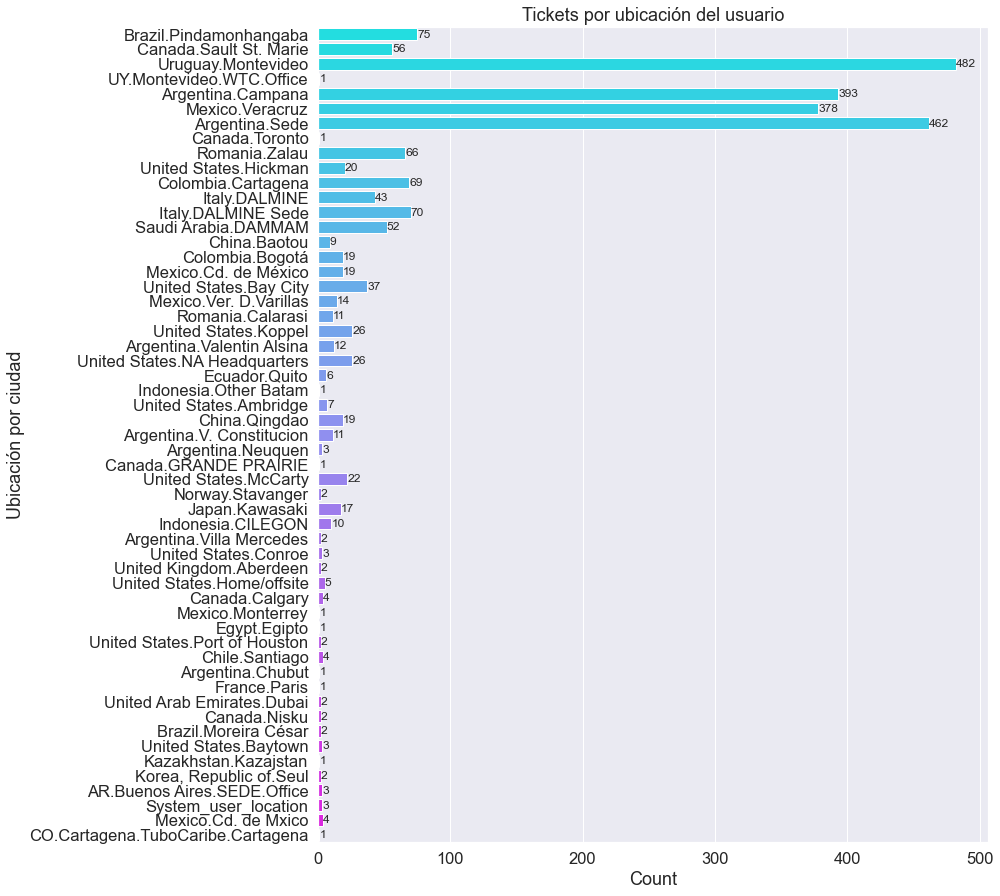

In [32]:
plt.figure(figsize=(12, 15))

g = sns.countplot(data = datos_1, y = 'LOCATION_NAME', palette = 'cool')

for c in g.containers:
    labels = [f'{int(v)}' for v in c.datavalues]
    g.bar_label(c, labels=labels, label_type='edge', size = 12)

plt.title("Tickets por ubicación del usuario", size = 18)

plt.ylabel('Ubicación por ciudad', size = 18)
plt.xlabel('Count', size = 18)

Agrupo las ubicaciones por país y lo almaceno en una nueva columna llamada COUNTRY

In [4]:
mapeo = {
    "United States.McCarty": "United States",
    "United States.Bay City": "United States",
    "United States.Hickman": "United States",
    "United States.Koppel": "United States",
    "United States.Conroe": "United States",
    "United States.Home/offsite": "United States",
    "United States.NA Headquarters": "United States",
    "United States.Baytown": "United States",
    "United States.Ambridge" : "United States",
    "United States.Port of Houston" : "United States",
    "Uruguay.Montevideo": "Uruguay",
    "UY.Montevideo.WTC.Office" : "Uruguay",
    "Mexico.Veracruz": "México",
    "Mexico.Ver. D.Varillas": "México",
    "Mexico.Cd. de México": "México",
    "Mexico.Cd. de Mxico": "México",
    "Mexico.Monterrey" : "México",
    "Italy.DALMINE": "Italia",
    "Italy.DALMINE Sede": "Italia",
    "AR.Buenos Aires.SEDE.Office": "Argentina",
    "Argentina.Sede": "Argentina",
    "Argentina.Campana": "Argentina",
    "Argentina.Villa Mercedes": "Argentina",
    "Argentina.Valentin Alsina": "Argentina",
    "Argentina.V. Constitucion": "Argentina",
    "Argentina.Chubut" : "Argentina",
    "Argentina.Neuquen" : "Argentina",
    "Romania.Zalau": "Rumania",
    "Romania.Calarasi": "Rumania",
    "Colombia.Cartagena": "Colombia",
    "Colombia.Bogotá": "Colombia",
    "CO.Cartagena.TuboCaribe.Cartagena": "Colombia",
    "Brazil.Pindamonhangaba": "Brasil",
    "Brazil.Moreira César": "Brasil",
    "Canada.Sault St. Marie": "Canada",
    "Canada.Nisku": "Canada",
    "Canada.GRANDE PRAIRIE" : "Canada",
    "Canada.Calgary": "Canada",
    "Canada.Toronto" : "Canada",
    "China.Baotou": "China",
    "China.Qingdao": "China",
    "Japan.Kawasaki": "Japon",
    "Indonesia.CILEGON": "Indonesia",
    "Indonesia.Other Batam" : "Indonesia",
    "Saudi Arabia.DAMMAM": "Arabia Saudita",
    "United Arab Emirates.Dubai" : "Emiratos Árabes",
    "United Kingdom.Aberdeen": "Reino Unido",
    "Ecuador.Quito": "Ecuador",
    "Norway.Stavanger" : "Noruega",
    "Chile.Santiago" : "Chile",
    "Korea, Republic of.Seul" : "Corea",
    "Kazakhstan.Kazajstan": "Kazajistán",
    "Egypt.Egipto" : "Egipto",
    "France.Paris": "Francia",
    "System_user_location" : "Genérico"

}

datos_1["COUNTRY"] = datos_1["LOCATION_NAME"].map(mapeo)

In [6]:
datos_1.columns

Index(['REQ_OPEN_DATE_ID_SK', 'ANALYST_INIT_CONTACT_ID_SK', 'REQ_TYPE_DESC',
       'REQ_CONFIG_ITEM_NAME', 'INIT_USER_GROUP', 'REQ_PRIORITY_SYM_DESC',
       'REQ_IMPACT_SYM_DESC', 'REQ_CATEGORY_NAME', 'LOCATION_NAME',
       'END_USER_CONTACT_ID_SK', 'ELAPSED_DAYS', 'DATA_MODEL', 'COUNTRY'],
      dtype='object')

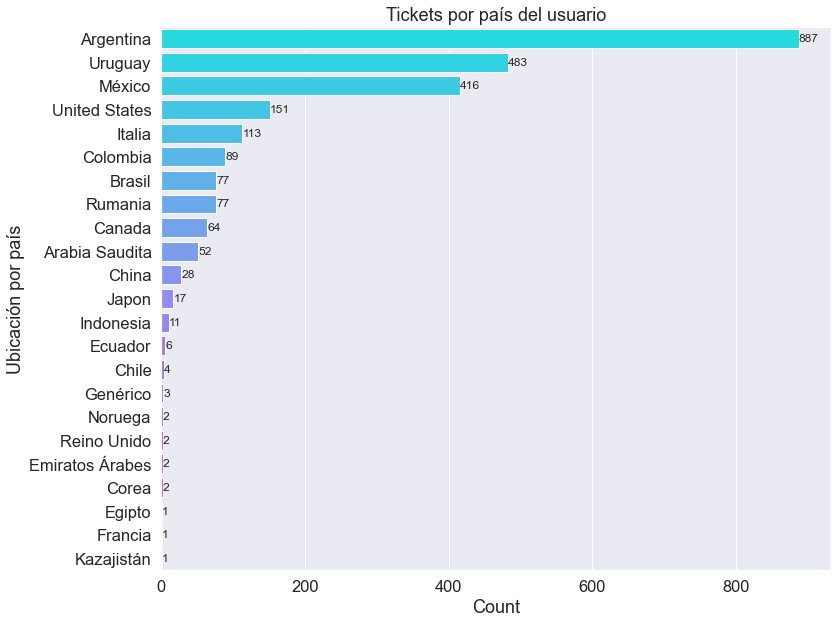

In [35]:
plt.figure(figsize=(12, 10))

g = sns.countplot(data = datos_1, y = 'COUNTRY', palette = 'cool',order = datos_1['COUNTRY'].value_counts().index)

for c in g.containers:
    labels = [f'{int(v)}' for v in c.datavalues]
    g.bar_label(c, labels=labels, label_type='edge', size = 12)

plt.title("Tickets por país del usuario", size = 18)

plt.ylabel('Ubicación por país', size = 18)
plt.xlabel('Count', size = 18)

plt.savefig('..\img\Tickets_por_país_requester.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

Exploro los modelos de los países que más generan tickets

<Figure size 864x864 with 0 Axes>

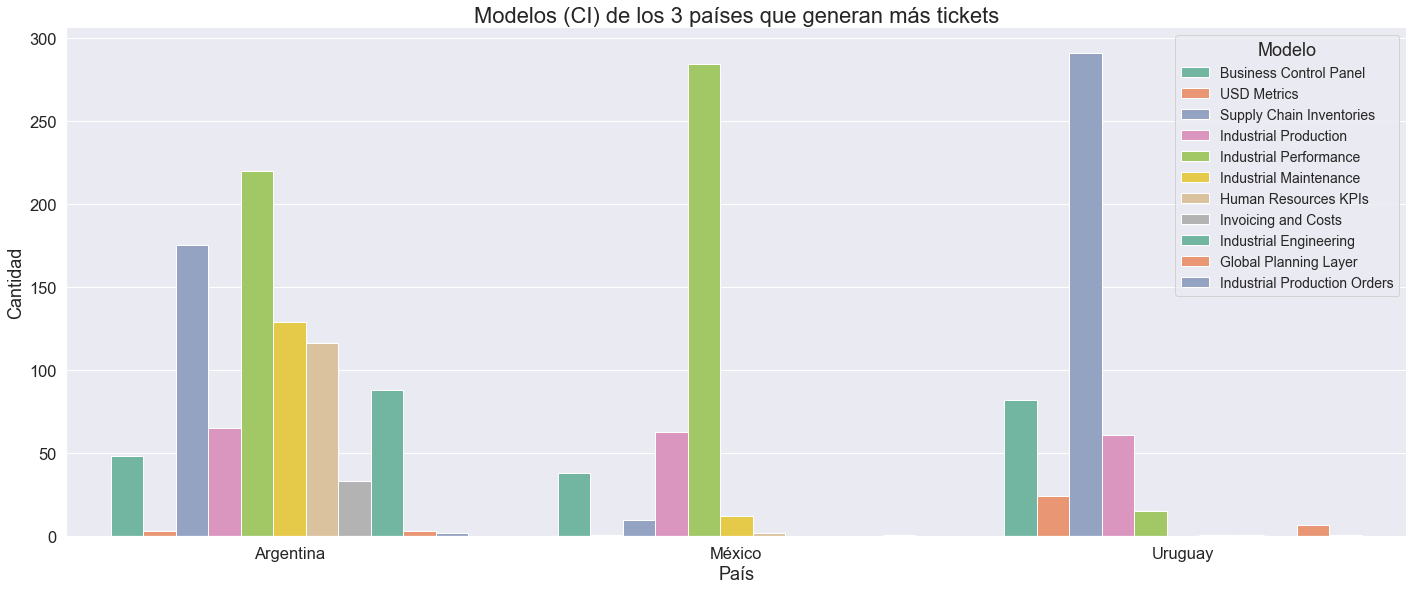

In [8]:
df_arg = datos_1[(datos_1["COUNTRY"] == "Argentina") | (datos_1["COUNTRY"] == "Uruguay") | (datos_1["COUNTRY"] == "México")]

orden = ['Argentina', 'México', 'Uruguay']

plt.figure(figsize=(12, 12))
g = sns.catplot(data = df_arg, x = 'COUNTRY', kind = 'count', hue = 'DATA_MODEL', palette = 'Set2', height=8, aspect=10/4,
                order = orden)
g._legend.remove()
ax = g.facet_axis(0, 0) 

ax.set_title("Modelos (CI) de los 3 países que generan más tickets", size = 22)
plt.ylabel('Cantidad', size = 18)
plt.xlabel('País', size = 18)

plt.legend(loc = 'upper right', title = 'Modelo', fontsize = 14)

plt.savefig('..\img\Tickets_por_3_país_modelo.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

Gráfico de tickets por categoría. No da mucha información ya que la mayoría se refiere a errores de datos

Text(0.5, 0, 'Count')

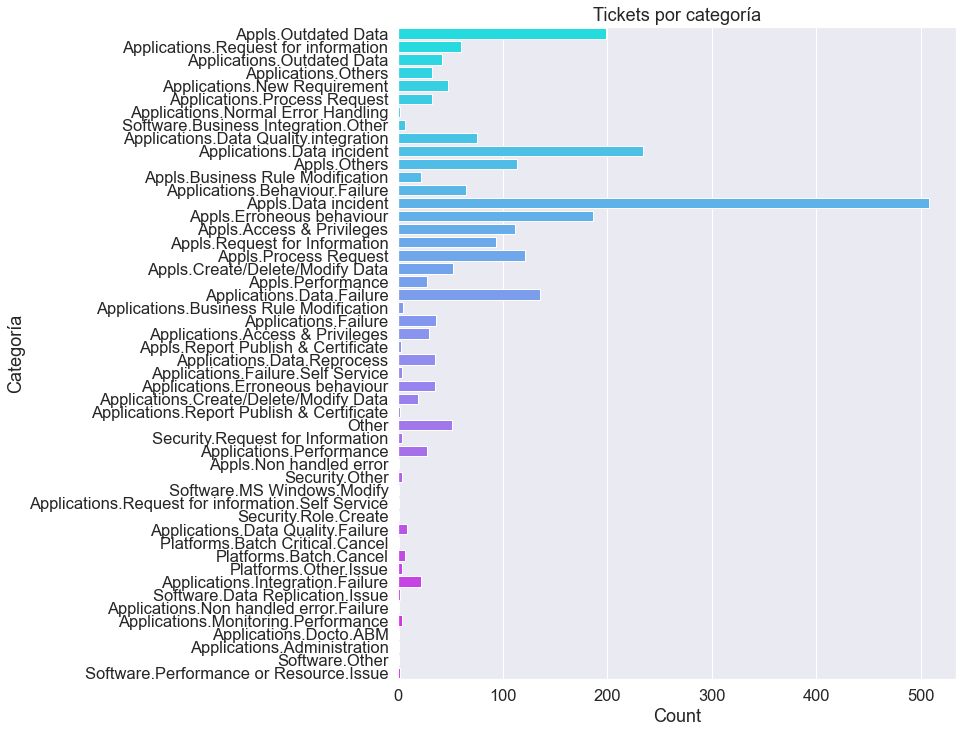

In [37]:
plt.figure(figsize=(10, 12))

g = sns.countplot(data = datos_1, y = 'REQ_CATEGORY_NAME', palette = 'cool')

plt.title("Tickets por categoría", size = 18)

plt.ylabel('Categoría', size = 18)
plt.xlabel('Count', size = 18)

Convierto la columna con la fecha a formato DATE para poder extrar el día de la semana en que se generó el ticket

In [6]:
datos_1['OPEN_DATE'] = pd.to_datetime(datos_1['REQ_OPEN_DATE_ID_SK'], format='%Y%m%d')

datos_1['WEEK_DAY'] = datos_1['OPEN_DATE'].dt.day_name()

In [6]:
mapeo_day = {
    'Monday' : 'Lunes',
    'Tuesday' : 'Martes',
    'Wednesday' : 'Miércoles',
    'Thursday' : 'Jueves',
    'Friday' : 'Viernes',
    'Saturday': 'Sábado',
    'Sunday' : 'Domingo'
}

datos_1["WEEK_DAY"] = datos_1["WEEK_DAY"].map(mapeo_day)


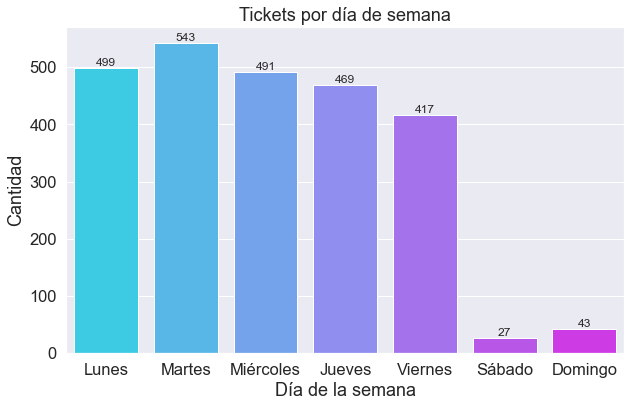

In [40]:
plt.figure(figsize=(10, 6))

orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

g = sns.countplot(data = datos_1, x = 'WEEK_DAY', palette = 'cool',
                    order = orden)

for c in g.containers:
    labels = [f'{int(v)}' for v in c.datavalues]
    g.bar_label(c, labels=labels, label_type='edge', size = 12)

plt.title("Tickets por día de semana", size = 18)

plt.ylabel('Cantidad', size = 18)
plt.xlabel('Día de la semana', size = 18)

plt.savefig('..\img\Tickets_por_dia_semana.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

Analizo la generación de tickets a través del tiempo

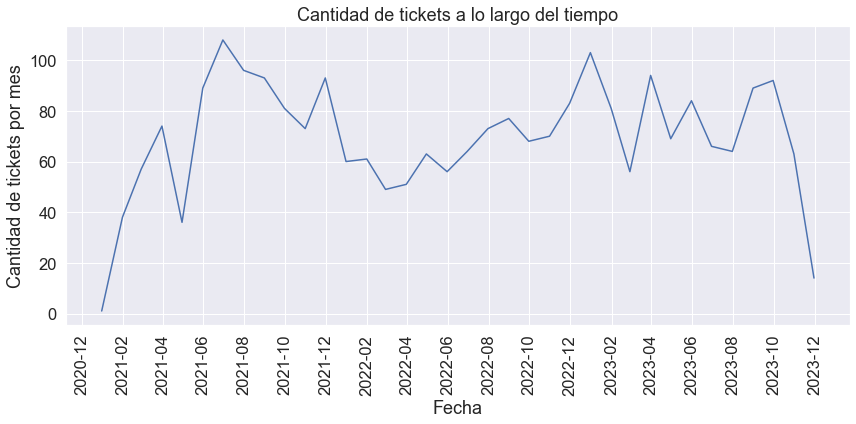

In [7]:
datos_1.set_index('OPEN_DATE', inplace=True)

conteo_por_mes = datos_1.resample('M').size()

plt.figure(figsize=(12, 6))
plt.plot(conteo_por_mes.index, conteo_por_mes.values, linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de tickets por mes')
plt.title('Cantidad de tickets a lo largo del tiempo')
plt.gca().xaxis.set_major_locator(MonthLocator(interval=2))
plt.xticks(rotation=90) 
plt.tight_layout()

plt.savefig('..\img\Tickets_por_mes.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

In [9]:
datos_1['OPEN_DATE'] = datos_1.index
datos_1.reset_index(inplace=True, drop=True)
datos_1

,REQ_OPEN_DATE_ID_SK,ANALYST_INIT_CONTACT_ID_SK,REQ_TYPE_DESC,REQ_CONFIG_ITEM_NAME,INIT_USER_GROUP,REQ_PRIORITY_SYM_DESC,REQ_IMPACT_SYM_DESC,REQ_CATEGORY_NAME,LOCATION_NAME,END_USER_CONTACT_ID_SK,ELAPSED_DAYS,DATA_MODEL,COUNTRY,WEEK_DAY,OPEN_DATE
0,20221226,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,2-Medium,2-Medium,Appls.Outdated Data,Brazil.Pindamonhangaba,178499,20,Industrial Performance,Brasil,Monday,2022-12-26
1,20230921,178499,Request,BI.Industrial.Production,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Request for information,Brazil.Pindamonhangaba,178499,8,Industrial Production,Brasil,Thursday,2023-09-21
2,20230404,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Outdated Data,Brazil.Pindamonhangaba,178499,8,Industrial Performance,Brasil,Tuesday,2023-04-04
3,20230816,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Others,Brazil.Pindamonhangaba,178499,43,Industrial Performance,Brasil,Wednesday,2023-08-16
4,20230814,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Outdated Data,Brazil.Pindamonhangaba,178499,0,Industrial Performance,Brasil,Monday,2023-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,20211104,143189,Incident,BI.Industrial.Production,GLOBAL SUPPORT SAP - Active Cycle,2-Medium,2-Medium,Appls.Data incident,Uruguay.Montevideo,107332,12,Industrial Production,Uruguay,Thursday,2021-11-04
2485,20220311,100023,Incident,BI.Industrial.Industrial_Performance,RA IND SUPPORT CA L2 IM,2-Medium,2-Medium,Appls.Erroneous behaviour,Canada.Sault St. Marie,93760,5,Industrial Performance,Canada,Friday,2022-03-11
2486,20230411,76508,Incident,BI.Industrial.Industrial_Performance,RA IND SUPPORT CA L2 IM,2-Medium,2-Medium,Applications.Data incident,Mexico.Veracruz,177508,0,Industrial Performance,México,Tuesday,2023-04-11
2487,20220930,149391,Incident,BI.Human Resources.Human Resources KPIs,GLOBAL SUPPORT HR - Passive Cycle,0-Critical,1-High,Appls.Erroneous behaviour,Argentina.Sede,149391,6,Human Resources KPIs,Argentina,Friday,2022-09-30


In [11]:

base_df = datos_1[['REQ_OPEN_DATE_ID_SK', 'OPEN_DATE']]
base_df.loc[len(base_df.index)] = ['20231231', '20231231'] 
base_df['OPEN_DATE'] = pd.to_datetime(base_df['OPEN_DATE'], format='%Y%m%d')


df_2021 = base_df[(base_df["OPEN_DATE"] >= "2021-01-01") & (base_df["OPEN_DATE"] <= "2021-12-31")]
count_2021 = df_2021['OPEN_DATE'].value_counts().sort_index()


df_2022 = base_df[(base_df["OPEN_DATE"] >= "2022-01-01") & (base_df["OPEN_DATE"] <= "2022-12-31")]
count_2022 = df_2022['OPEN_DATE'].value_counts().sort_index()


df_2023 = base_df[(base_df["OPEN_DATE"] >= "2023-01-01") & (base_df["OPEN_DATE"] <= "2023-12-31")]
count_2023 = df_2023['OPEN_DATE'].value_counts().sort_index()

C:\Users\natit\AppData\Local\Temp\ipykernel_7216\2694486779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df.loc[len(base_df.index)] = ['20231231', '20231231']
C:\Users\natit\AppData\Local\Temp\ipykernel_7216\2694486779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_df['OPEN_DATE'] = pd.to_datetime(base_df['OPEN_DATE'], format='%Y%m%d')


C:\Users\natit\AppData\Local\Temp\ipykernel_7216\3015032612.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])


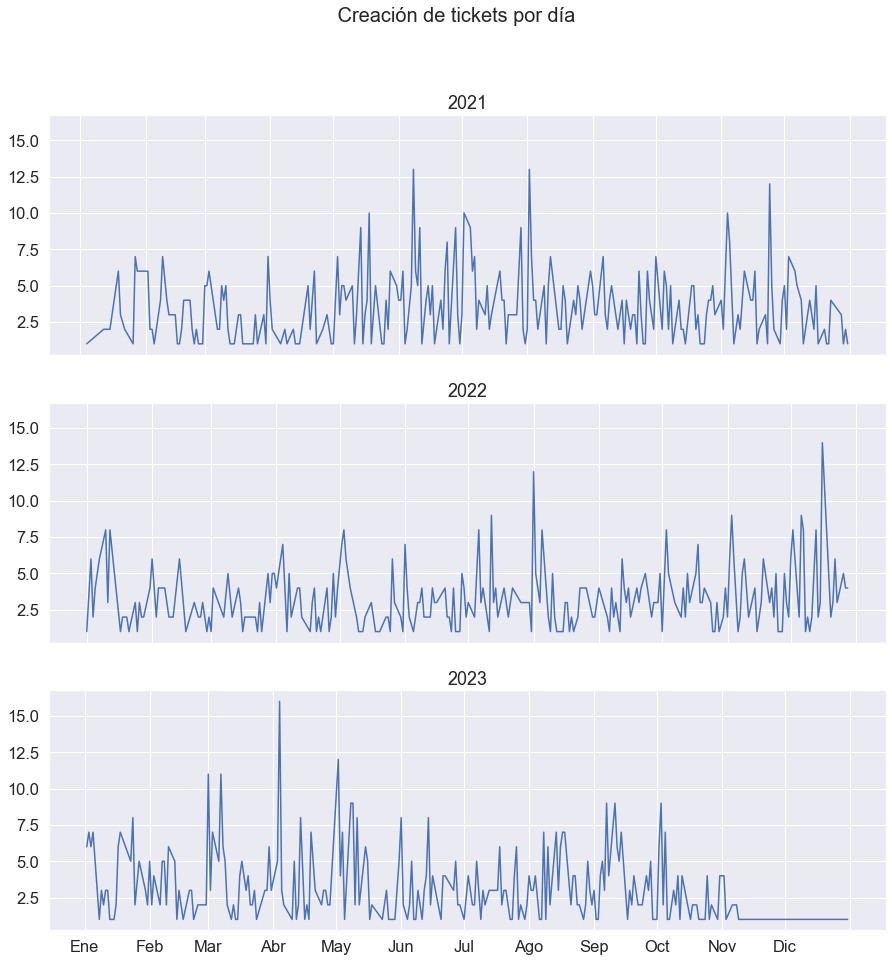

In [12]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, sharey=True, figsize = (15,15))

locator = mdates.MonthLocator(range(1, 13)) 
fmt = mdates.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)


ax1.plot(count_2021, linestyle='-')
ax1.set_title('2021')
ax1.set_xticks(['2021-01', '2021-02', '2021-03', '2021-04',
                '2021-05', '2021-06', '2021-07', '2021-08',
                '2021-09', '2021-10', '2021-11', '2021-12',
                '2022-01'])
ax1.set_xticklabels([])

ax2.plot(count_2022, linestyle='-')
ax2.set_title('2022')
ax2.set_xticks(['2022-01', '2022-02', '2022-03', '2022-04',
                '2022-05', '2022-06', '2022-07', '2022-08',
                '2022-09', '2022-10', '2022-11', '2022-12',
                '2023-01'])
ax2.set_xticklabels([])

ax3.plot(count_2023, linestyle='-')
ax3.set_title('2023')
ax3.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

fig.suptitle(' Creación de tickets por día', fontsize=20)
plt.savefig('..\img\Tickets_por_dia.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

In [9]:
datos_1['OPEN_DATE'] = datos_1.index
datos_1.reset_index(inplace=True, drop=True)
datos_1

,REQ_OPEN_DATE_ID_SK,ANALYST_INIT_CONTACT_ID_SK,REQ_TYPE_DESC,REQ_CONFIG_ITEM_NAME,INIT_USER_GROUP,REQ_PRIORITY_SYM_DESC,REQ_IMPACT_SYM_DESC,REQ_CATEGORY_NAME,LOCATION_NAME,END_USER_CONTACT_ID_SK,ELAPSED_DAYS,DATA_MODEL,COUNTRY,OPEN_DATE,WEEK_DAY
0,20221226,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,2-Medium,2-Medium,Appls.Outdated Data,Brazil.Pindamonhangaba,178499,20,Industrial Performance,Brasil,1,Lunes
1,20230921,178499,Request,BI.Industrial.Production,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Request for information,Brazil.Pindamonhangaba,178499,8,Industrial Production,Brasil,2,Jueves
2,20230404,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Outdated Data,Brazil.Pindamonhangaba,178499,8,Industrial Performance,Brasil,3,Martes
3,20230816,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Others,Brazil.Pindamonhangaba,178499,43,Industrial Performance,Brasil,4,Miércoles
4,20230814,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Outdated Data,Brazil.Pindamonhangaba,178499,0,Industrial Performance,Brasil,5,Lunes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,20211104,143189,Incident,BI.Industrial.Production,GLOBAL SUPPORT SAP - Active Cycle,2-Medium,2-Medium,Appls.Data incident,Uruguay.Montevideo,107332,12,Industrial Production,Uruguay,2485,Jueves
2485,20220311,100023,Incident,BI.Industrial.Industrial_Performance,RA IND SUPPORT CA L2 IM,2-Medium,2-Medium,Appls.Erroneous behaviour,Canada.Sault St. Marie,93760,5,Industrial Performance,Canada,2486,Viernes
2486,20230411,76508,Incident,BI.Industrial.Industrial_Performance,RA IND SUPPORT CA L2 IM,2-Medium,2-Medium,Applications.Data incident,Mexico.Veracruz,177508,0,Industrial Performance,México,2487,Martes
2487,20220930,149391,Incident,BI.Human Resources.Human Resources KPIs,GLOBAL SUPPORT HR - Passive Cycle,0-Critical,1-High,Appls.Erroneous behaviour,Argentina.Sede,149391,6,Human Resources KPIs,Argentina,2488,Viernes


Analizo la distribución de tickets por cantidad de días que tomó resolverlos

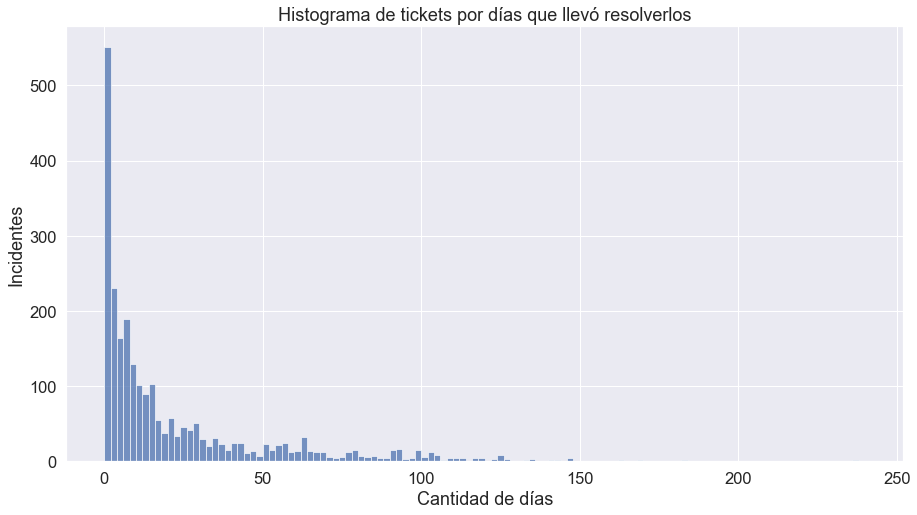

In [82]:
plt.figure(figsize=(15, 8))
elapsed = sns.histplot(data=datos_1, x="ELAPSED_DAYS",binwidth=2)
elapsed.set(xlabel = 'Cantidad de días', ylabel = 'Incidentes')
plt.title('Histograma de tickets por días que llevó resolverlos')
plt.savefig('..\img\hist.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

Agrupo los tickets por modelo para obtener la media y la mediana de días de resolución

In [4]:
d_group_1 = datos_1.groupby(['DATA_MODEL'])['ELAPSED_DAYS'].median()

df = d_group_1.reset_index()

df = df.rename(columns={'ELAPSED_DAYS': 'Mediana', 'DATA_MODEL': 'Modelo'})

d_group_2 = datos_1.groupby(['DATA_MODEL'])['ELAPSED_DAYS'].mean()

df2 = d_group_2.reset_index()

df2 = df2.rename(columns={'ELAPSED_DAYS': 'Media', 'DATA_MODEL': 'Modelo'})

df_1_2 = pd.merge(df, df2, on='Modelo', how='inner')

df_1_2['Mediana'] = df_1_2['Mediana'].astype(int)
df_1_2['Media'] = df_1_2['Media'].round(2)

In [5]:
df_1_2

,Modelo,Mediana,Media
0,Business Control Panel,15,32.57
1,Global Planning Layer,18,22.60
2,Human Resources KPIs,8,16.49
3,Industrial Engineering,11,24.52
4,Industrial Maintenance,16,43.84
5,Industrial Performance,8,17.21
6,Industrial Production,6,19.09
7,Industrial Production Orders,68,44.44
8,Invoicing and Costs,6,21.55
9,Supply Chain Inventories,10,25.47


Agrupo por prioridad para obtener la media y la mediana

In [6]:
d_group_3 = datos_1.groupby(['REQ_PRIORITY_SYM_DESC'])['ELAPSED_DAYS'].median()

df3 = d_group_3.reset_index()

df3 = df3.rename(columns={'ELAPSED_DAYS': 'Mediana', 'REQ_PRIORITY_SYM_DESC': 'Priority'})

d_group_4 = datos_1.groupby(['REQ_PRIORITY_SYM_DESC'])['ELAPSED_DAYS'].mean()

df4 = d_group_4.reset_index()

df4 = df4.rename(columns={'ELAPSED_DAYS': 'Media', 'REQ_PRIORITY_SYM_DESC': 'Priority'})

df_3_4 = pd.merge(df3, df4, on='Priority', how='inner')

df_3_4['Mediana'] = df_3_4['Mediana'].astype(int)
df_3_4['Media'] = df_3_4['Media'].round(2)


In [7]:
df_3_4

,Priority,Mediana,Media
0,0-Critical,1,4.86
1,1-High,8,15.51
2,2-Medium,14,29.39
3,3-Low,9,27.96


In [46]:
bins = list(range(0, 240, 20))
bins[0] = -1 #Para que tome el cero
labels = [str(elemento) for elemento in bins[1:]]

datos_1['DAYS_RANGE_bins'] = pd.cut(datos_1['ELAPSED_DAYS'], bins=bins, labels=labels)

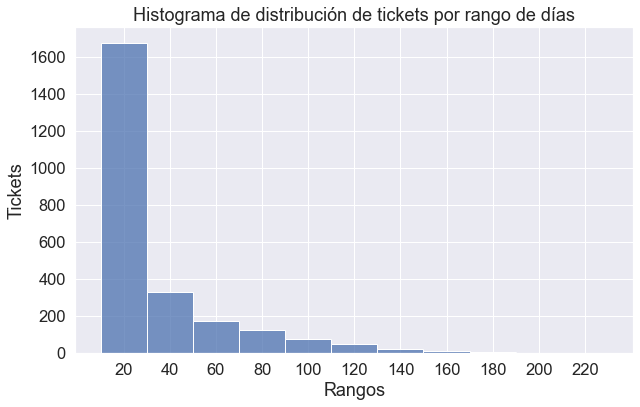

In [47]:
plt.figure(figsize=(10, 6))
elapsed = sns.histplot(data=datos_1, x="DAYS_RANGE_bins",binwidth=1)
elapsed.set(xlabel = 'Rangos', ylabel = 'Tickets')

plt.title('Histograma de distribución de tickets por rango de días')
plt.savefig('..\img\hist_12_bins.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

In [48]:
datos_1['DAYS_RANGE_bins'] = pd.cut(datos_1['ELAPSED_DAYS'], bins=[-1, 20,240], labels=['<20', '20<'])

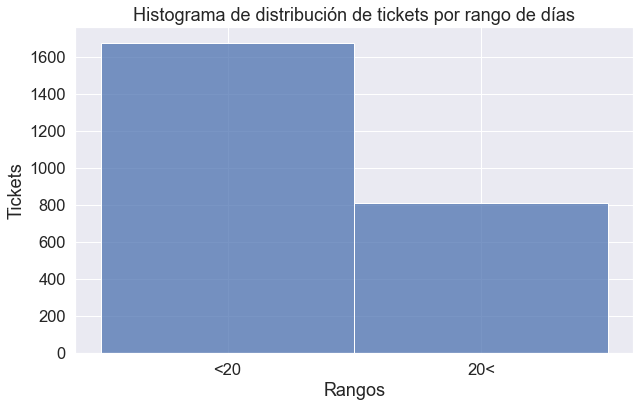

In [49]:
plt.figure(figsize=(10, 6))
elapsed = sns.histplot(data=datos_1, x="DAYS_RANGE_bins",binwidth=1)
elapsed.set(xlabel = 'Rangos', ylabel = 'Tickets')

plt.title('Histograma de distribución de tickets por rango de días')
plt.savefig('..\img\hist_2_bins.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

Categorizo los registros en '<5', '5-15' y '15<' y almaceno las categorías en una nueva columna 'DAYS_RANGE'

In [62]:
datos_1['DAYS_RANGE'] = pd.cut(datos_1['ELAPSED_DAYS'], bins=[-1, 5, 15,240], labels=['<5', '6-15', '16<'])

Compruebo que se haya agregado la columna con la categoría

In [80]:
datos_1

,REQ_OPEN_DATE_ID_SK,ANALYST_INIT_CONTACT_ID_SK,REQ_TYPE_DESC,REQ_CONFIG_ITEM_NAME,INIT_USER_GROUP,REQ_PRIORITY_SYM_DESC,REQ_IMPACT_SYM_DESC,REQ_CATEGORY_NAME,LOCATION_NAME,END_USER_CONTACT_ID_SK,ELAPSED_DAYS,DATA_MODEL,COUNTRY,WEEK_DAY,OPEN_DATE,DAYS_RANGE
0,20221226,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,2-Medium,2-Medium,Appls.Outdated Data,Brazil.Pindamonhangaba,178499,20,Industrial Performance,Brasil,Lunes,2022-12-26,15<
1,20230921,178499,Request,BI.Industrial.Production,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Request for information,Brazil.Pindamonhangaba,178499,8,Industrial Production,Brasil,Jueves,2023-09-21,5-15
2,20230404,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Outdated Data,Brazil.Pindamonhangaba,178499,8,Industrial Performance,Brasil,Martes,2023-04-04,5-15
3,20230816,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Others,Brazil.Pindamonhangaba,178499,43,Industrial Performance,Brasil,Miércoles,2023-08-16,15<
4,20230814,178499,Incident,BI.Industrial.Industrial_Performance,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Outdated Data,Brazil.Pindamonhangaba,178499,0,Industrial Performance,Brasil,Lunes,2023-08-14,<5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,20211104,143189,Incident,BI.Industrial.Production,GLOBAL SUPPORT SAP - Active Cycle,2-Medium,2-Medium,Appls.Data incident,Uruguay.Montevideo,107332,12,Industrial Production,Uruguay,Jueves,2021-11-04,5-15
2485,20220311,100023,Incident,BI.Industrial.Industrial_Performance,RA IND SUPPORT CA L2 IM,2-Medium,2-Medium,Appls.Erroneous behaviour,Canada.Sault St. Marie,93760,5,Industrial Performance,Canada,Viernes,2022-03-11,<5
2486,20230411,76508,Incident,BI.Industrial.Industrial_Performance,RA IND SUPPORT CA L2 IM,2-Medium,2-Medium,Applications.Data incident,Mexico.Veracruz,177508,0,Industrial Performance,México,Martes,2023-04-11,<5
2487,20220930,149391,Incident,BI.Human Resources.Human Resources KPIs,GLOBAL SUPPORT HR - Passive Cycle,0-Critical,1-High,Appls.Erroneous behaviour,Argentina.Sede,149391,6,Human Resources KPIs,Argentina,Viernes,2022-09-30,5-15


Creo un gráfico para ver la distribución de los tickets por categorías. La categoría que contiene menos registros es '6-15'

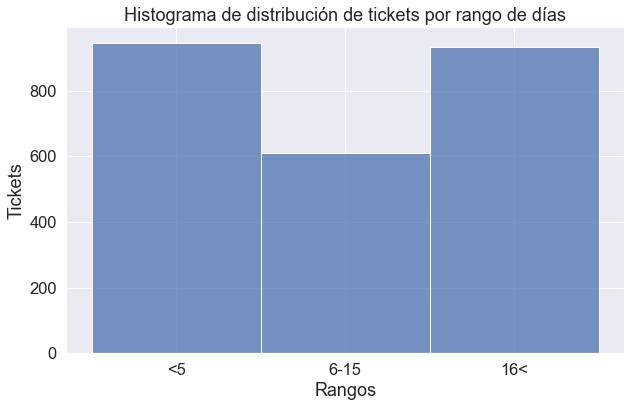

In [63]:
plt.figure(figsize=(10, 6))
elapsed = sns.histplot(data=datos_1, x="DAYS_RANGE",binwidth=1)
elapsed.set(xlabel = 'Rangos', ylabel = 'Tickets')

plt.title('Histograma de distribución de tickets por rango de días')
plt.savefig('..\img\elapsed_days_hist.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

Tiro las columnas innecesarias y guardo el dataset con las nuevas columnas

In [12]:
datos_1 = datos_1.drop(['REQ_OPEN_DATE_ID_SK', 'REQ_CONFIG_ITEM_NAME', 'DAYS_RANGE_bins'], axis=1)

In [13]:
datos_1.to_csv('..\Archivos\data_req_inc_2.csv', index=False)

In [14]:
datos_1

,ANALYST_INIT_CONTACT_ID_SK,REQ_TYPE_DESC,INIT_USER_GROUP,REQ_PRIORITY_SYM_DESC,REQ_IMPACT_SYM_DESC,REQ_CATEGORY_NAME,LOCATION_NAME,END_USER_CONTACT_ID_SK,ELAPSED_DAYS,DATA_MODEL,COUNTRY,OPEN_DATE,WEEK_DAY,DAYS_RANGE
0,178499,Incident,CONFAB.APPL INDUSTRIAL,2-Medium,2-Medium,Appls.Outdated Data,Brazil.Pindamonhangaba,178499,20,Industrial Performance,Brasil,1,Lunes,16<
1,178499,Request,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Request for information,Brazil.Pindamonhangaba,178499,8,Industrial Production,Brasil,2,Jueves,6-15
2,178499,Incident,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Outdated Data,Brazil.Pindamonhangaba,178499,8,Industrial Performance,Brasil,3,Martes,6-15
3,178499,Incident,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Others,Brazil.Pindamonhangaba,178499,43,Industrial Performance,Brasil,4,Miércoles,16<
4,178499,Incident,CONFAB.APPL INDUSTRIAL,3-Low,3-Low,Applications.Outdated Data,Brazil.Pindamonhangaba,178499,0,Industrial Performance,Brasil,5,Lunes,<5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,143189,Incident,GLOBAL SUPPORT SAP - Active Cycle,2-Medium,2-Medium,Appls.Data incident,Uruguay.Montevideo,107332,12,Industrial Production,Uruguay,2485,Jueves,6-15
2485,100023,Incident,RA IND SUPPORT CA L2 IM,2-Medium,2-Medium,Appls.Erroneous behaviour,Canada.Sault St. Marie,93760,5,Industrial Performance,Canada,2486,Viernes,<5
2486,76508,Incident,RA IND SUPPORT CA L2 IM,2-Medium,2-Medium,Applications.Data incident,Mexico.Veracruz,177508,0,Industrial Performance,México,2487,Martes,<5
2487,149391,Incident,GLOBAL SUPPORT HR - Passive Cycle,0-Critical,1-High,Appls.Erroneous behaviour,Argentina.Sede,149391,6,Human Resources KPIs,Argentina,2488,Viernes,6-15


## Análisis exploratorio

Cargo el csv y factorizo los registros para convertirlos de categóricos a numéricos

In [16]:
datos=pd.read_csv('..\Archivos\data_req_inc_2.csv', delimiter=',')

impact_priority_map = {'3-Low': 0, '2-Medium': 1, '1-High': 2, '0-Critical': 3}

datos['INIT_USER_GROUP']=pd.factorize(datos.INIT_USER_GROUP)[0]

datos['DATA_MODEL']=pd.factorize(datos.DATA_MODEL)[0]

datos['REQ_PRIORITY_SYM_DESC'] = datos['REQ_PRIORITY_SYM_DESC'].replace(impact_priority_map)

datos['REQ_IMPACT_SYM_DESC'] = datos['REQ_IMPACT_SYM_DESC'].replace(impact_priority_map)

datos['REQ_CATEGORY_NAME']=pd.factorize(datos.REQ_CATEGORY_NAME)[0]

datos['LOCATION_NAME']=pd.factorize(datos.LOCATION_NAME)[0]

datos['END_USER_CONTACT_ID_SK']=pd.factorize(datos.END_USER_CONTACT_ID_SK)[0]

datos['COUNTRY']=pd.factorize(datos.COUNTRY)[0]

datos['ANALYST_INIT_CONTACT_ID_SK']=pd.factorize(datos.ANALYST_INIT_CONTACT_ID_SK)[0]

datos['WEEK_DAY']=pd.factorize(datos.WEEK_DAY)[0]

datos['OPEN_DATE'] = pd.factorize(datos.OPEN_DATE)[0]

datos['REQ_TYPE_DESC'] = pd.factorize(datos.REQ_TYPE_DESC)[0]

range_map = {'<5': 0, '6-15': 1, '16<': 2}

datos['DAYS_RANGE'] = datos['DAYS_RANGE'].replace(range_map)

datos.to_csv('..\Archivos\data_req_inc_3.csv', index=False)


Cargo mi nuevo dataset para el análisis exploratorio

In [153]:
datos=np.loadtxt('..\Archivos\data_req_inc_3.csv',delimiter=',',skiprows=1, usecols=(0,1,2,3,4,5,6,7,9,10,11,12))

In [154]:
headers=['Requester', 'Ticket Type', 'Requester Group', 'Priority', 'Impact', 'Category', 'Requester City', 'End User', 'Data Model',
          'Requester Country', 'Week Day', 'Open Date']

Escalo los datos para estandarizarlos

In [155]:
scaler=StandardScaler()
scaler.fit(datos)
x=scaler.transform(datos)

Aplico PCA y grafico los datos estandarizados

In [156]:
pca = PCA()
plt.rcParams["figure.figsize"] = (13, 13)
pca.fit(x)
x_new = pca.transform(x)

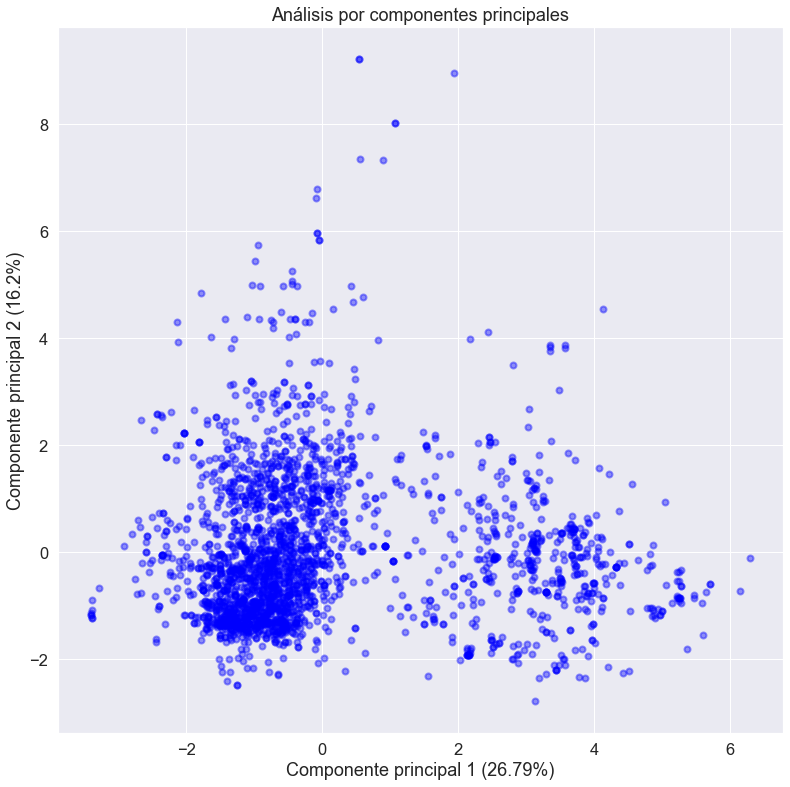

In [10]:
                                                        
def myplot(score, coeff, labels=None):
    
    x1=score[:,0]
    x2=score[:,1]
    vars = pca.explained_variance_ratio_
    var1 = round(100*vars[0],2)
    var2 = round(100*vars[1],2)
    
    n=coeff.shape[0]
    
    scatter=plt.scatter(x1,x2,lw=2, color="blue", alpha=0.4)
    plt.xlabel("Componente principal 1 ({}%)".format(var1))
    plt.ylabel("Componente principal 2 ({}%)".format(var2))
    plt.title("Análisis por componentes principales")

    plt.savefig('..\img\PCA.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')
 

myplot(x_new, pca.components_, headers)


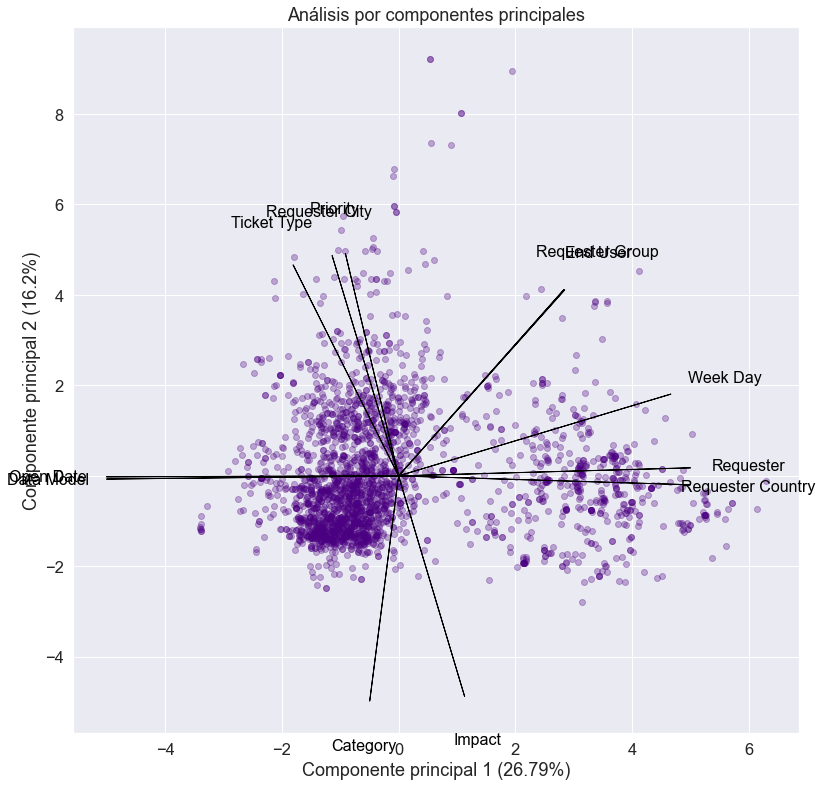

In [157]:
def myplot(score, coeff, labels):
    
    x1=score[:,0]
    x2=score[:,1]
    
    n=coeff.shape[0]
    
    plt.scatter(x1,x2, color="indigo", alpha=0.3)
    
    vars = pca.explained_variance_ratio_
    var1 = round(100*vars[0],2)
    var2 = round(100*vars[1],2)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*5/(coeff[i,0]**2+coeff[i,1]**2)**0.5, coeff[i,1]*5/(coeff[i,0]**2+coeff[i,1]**2)**0.5, color = 'Black') 
        if labels is None:
            plt.text(coeff[i,0]* 6/(coeff[i,0]**2+coeff[i,1]**2)**0.5, coeff[i,1] * 6/(coeff[i,0]**2+coeff[i,1]**2)**0.5/(coeff[i,0]**2+coeff[i,1]**2)**0.5, "Var"+str(i+1),alpha=0.5, color = 'Black', ha = 'center', va = 'center', fontsize=16)
        else:
            plt.text(coeff[i,0]* 6/(coeff[i,0]**2+coeff[i,1]**2)**0.5, coeff[i,1] * 6/(coeff[i,0]**2+coeff[i,1]**2)**0.5, labels[i], color = 'Black', ha = 'center', va = 'center', fontsize=16)
    
    plt.xlabel("Componente principal 1 ({}%)".format(var1))
    plt.ylabel("Componente principal 2 ({}%)".format(var2))
    plt.title("Análisis por componentes principales")

    plt.savefig('..\img\PCA_arrows.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')

myplot(x_new, pca.components_, headers)

Muestro los coeficientes de cada componente principal

In [22]:
x2=np.loadtxt('..\Archivos\data_req_inc_3.csv',delimiter=',', skiprows=1, usecols=(0,1,2,3,4,5,6,7,9,10,11,12))

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(x2)

modelo_pca = pca_pipe.named_steps['pca']

cuadro=(pd.DataFrame(
        data    = modelo_pca.components_ ,
        columns = headers ,
        index   = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12']
    ))


Armo la tabla para mostrar los coeficientes.

In [23]:
cuadro = cuadro.round(4)

In [24]:
cuadro

,Requester,Ticket Type,Requester Group,Priority,Impact,Category,Requester City,End User,Data Model,Requester Country,Week Day,Open Date
PCA1,0.5046,0.0180,0.5060,0.2628,0.2559,0.1814,0.0300,0.3396,-0.0103,0.0100,0.4527,-0.0112
PCA2,-0.0757,0.1956,-0.0740,-0.0995,-0.1170,0.1014,0.6151,0.2474,-0.2987,0.6189,-0.0025,0.0692
PCA3,0.1896,0.2758,0.1916,-0.6068,-0.6093,0.0093,-0.1061,0.1372,0.1777,-0.1265,0.1691,0.0741
PCA4,-0.1180,0.6369,-0.1162,0.1310,0.1544,0.6004,-0.1379,-0.0248,0.0202,-0.1576,-0.1282,0.3226
PCA5,0.0533,-0.2298,0.0614,0.0299,0.0002,-0.2228,0.0263,-0.0809,0.0359,0.0467,0.0348,0.9371
PCA6,-0.0313,-0.3151,-0.0335,-0.0570,0.0325,0.4022,0.2624,-0.0259,0.7969,0.1594,-0.0455,-0.0222
PCA7,-0.1085,0.4644,-0.1036,0.1756,0.1630,-0.5946,0.1110,0.3486,0.4640,-0.0407,0.0048,-0.0091
PCA8,0.2312,0.3342,0.2347,0.0468,0.0381,-0.1662,0.1160,-0.7992,0.1215,0.2647,0.0713,-0.0804
PCA9,-0.3465,-0.0048,-0.3251,-0.0916,0.0865,0.0345,0.0483,-0.1511,-0.0136,-0.0754,0.8521,0.0092
PCA10,0.0790,-0.0031,0.0664,-0.1897,0.1707,-0.0134,0.6755,-0.1053,-0.1083,-0.6600,-0.0968,0.0057


Screeplot

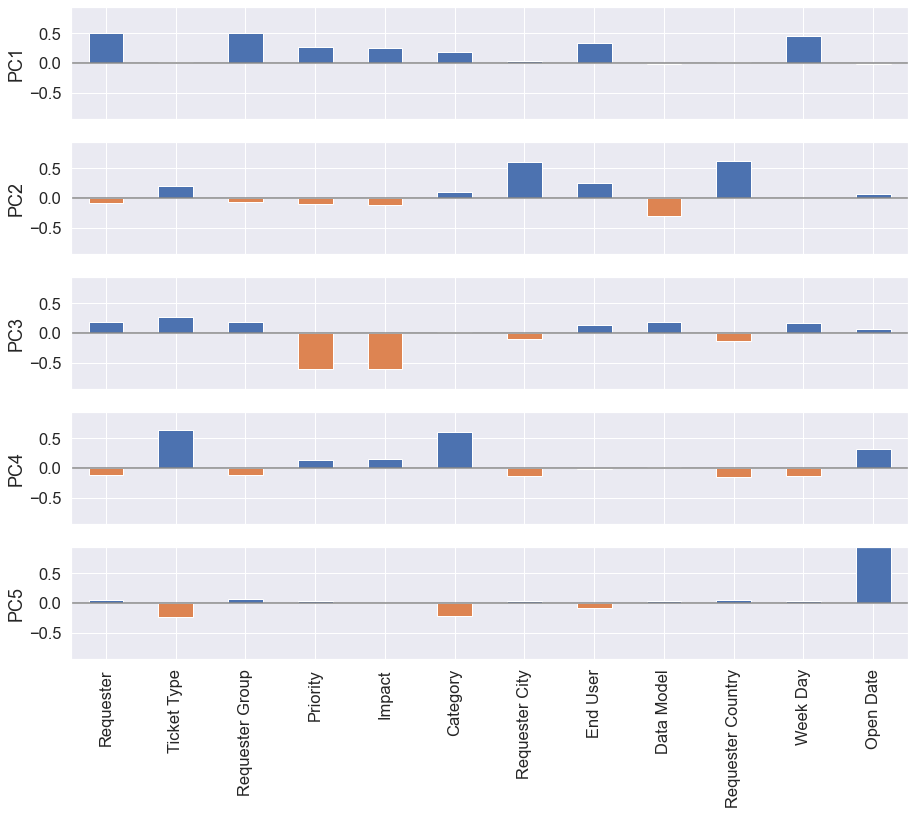

In [16]:
pesos =(pd.DataFrame(
        data    = modelo_pca.components_ [0:5, :],
        columns = headers))

maxPC = 1.01 * np.max(np.max(np.abs(pesos.loc[0:5, :])))

f, axes = plt.subplots(5,1, figsize = (15,12), sharex= True)

for i, ax in enumerate(axes):
    pc_pesos = pesos.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_pesos]
    ax.axhline(color = '#888888')
    pc_pesos.plot.bar(ax = ax, color = colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

In [25]:
print('Varianza: ',[round(x,3) for x in pca.explained_variance_ratio_])
print('Varianza acumulada:', np.cumsum(pca.explained_variance_ratio_))

Varianza:  [0.268, 0.162, 0.133, 0.087, 0.082, 0.077, 0.067, 0.047, 0.031, 0.024, 0.02, 0.001]
Varianza acumulada: [0.26785568 0.42988438 0.56324272 0.65006623 0.73251249 0.80994665
 0.87648451 0.92385367 0.95463396 0.97871932 0.99861285 1.        ]


In [148]:
explained_variance = pca.explained_variance_ratio_.round(3)
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
x_range = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

([<matplotlib.axis.XTick at 0x209c5731ae0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

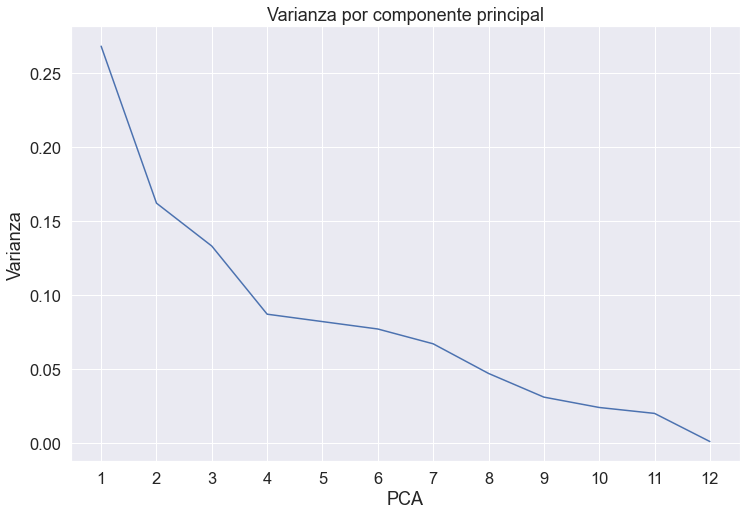

In [112]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(explained_variance)
plt.title('Varianza por componente principal')
plt.ylabel('Varianza')
plt.xlabel('PCA')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels = x_range)

([<matplotlib.axis.XTick at 0x209cacf5660>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

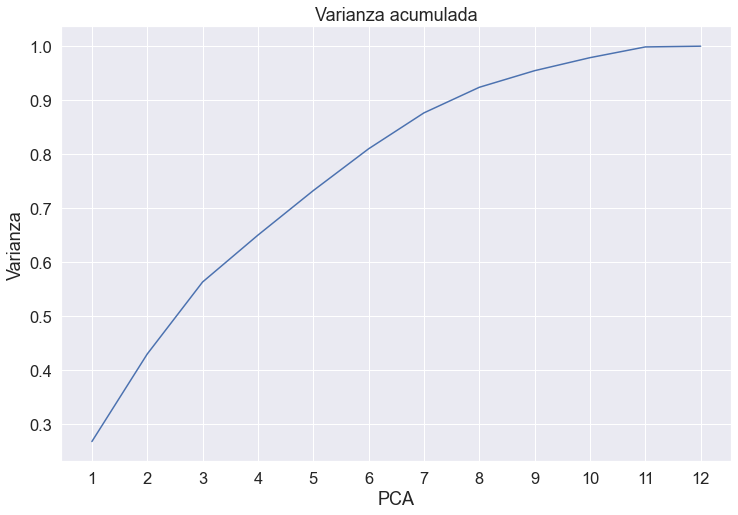

In [115]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(cum_explained_variance)
plt.title('Varianza acumulada')
plt.ylabel('Varianza')
plt.xlabel('PCA')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels = x_range)

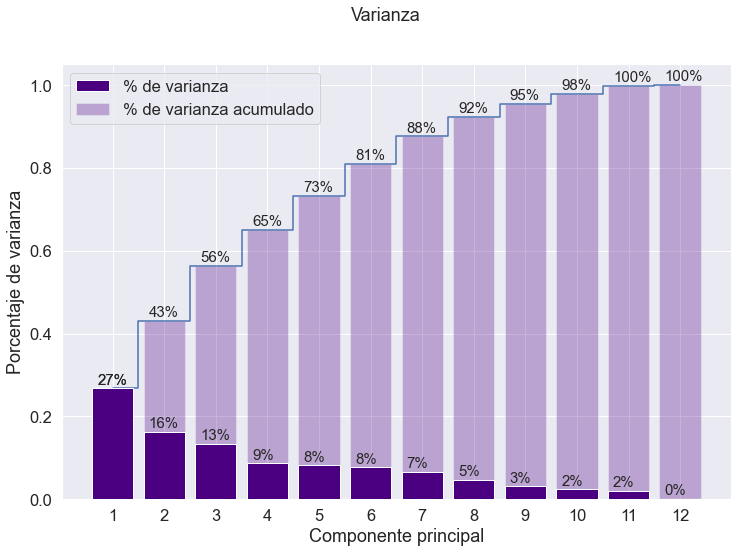

In [149]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.bar(x = x_range, height = explained_variance, zorder = 20,
       color = "indigo", label = "% de varianza")
ax.bar(x = x_range, height = cum_explained_variance,color = "indigo", alpha = 0.3,
       label = "% de varianza acumulado")
ax.step(x = x_range, y = cum_explained_variance, where = "mid")
ax.set_xlabel("Componente principal")
ax.set_ylabel("Porcentaje de varianza")
for i, v in enumerate(explained_variance):
    ax.text(x = i - 0.3, y = v + 0.01, s = str(round(v * 100)) + "%", fontsize = 15)
for i, v in enumerate(cum_explained_variance[0:], start = 0):
    ax.text(x = i - 0.3, y = v + 0.01, s = str(round(v * 100)) + "%", fontsize = 15)
ax.set_xticks(x_range, labels = x_range)
ax.legend()
fig.suptitle('Varianza', size = 18)
plt.savefig('..\img\PCA_variance.png', bbox_inches='tight', pad_inches=0.2, facecolor='white')